# Deepfake Detection in Action

In [ ]:
!pip install mtcnn # (Multi-Task Cascaded Convolutional Neural Network)
# MTCNN is a popular face detection library that can be used to detect faces in images.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import glob2 # you can use its functions to search for files in directories,
import os,fnmatch
from pathlib import Path
from mtcnn.mtcnn import MTCNN

In [ ]:
def extract_multiple_videos(intput_filenames, image_path_infile):
    """Extract video files into sequence of images."""
    i = 1  # Counter of first video
    # Iterate file names:
    cap = cv2.VideoCapture('your_video_file_path.avi' or intput_filenames)
    if (cap.isOpened()== False):
            print("Error opening file")
    # Keep iterating break
    while True:
        ret, frame = cap.read()  # Read frame from first video

        if ret:
            cv2.imwrite(os.path.join(image_path_infile , str(i) + '.jpg'), frame)  # Write frame to JPEG file (1.jpg, 2.jpg, ...)
    # u can uncomment this line if you want to view them.
    #         cv2.imshow('frame', frame)  # Display frame for testing
            i += 1 # Advance file counter
        else:
            # Break the interal loop when res status is False.
            break
    cv2.waitKey(50) #Wait 50msec
    cap.release()

In [ ]:
input_filenames = ["video1.avi", "video2.avi", "video3.avi"]
image_path_infile = "output_images/"
extract_multiple_videos(input_filenames, image_path_infile)

In [ ]:
import skimage

In [ ]:
from skimage import metrics

def mse(imageA, imageB):
    # Resize imageB to match the dimensions of imageA
    imageB_resized = cv2.resize(imageB, (imageA.shape[1], imageA.shape[0]))

    # Compute the mean squared error
    err = np.sum((imageA.astype("float") - imageB_resized.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # Return the MSE
    return err
def compare_images(imageA, imageB, title, labelA='Original', labelB='Deepfake'):
    # Resize imageB to match the dimensions of imageA
    imageB_resized = cv2.resize(imageB, (imageA.shape[1], imageA.shape[0]))

    # Compute the mean squared error
    m = mse(imageA, imageB_resized)

    # Compute the structural similarity index
    s = skimage.metrics.structural_similarity(imageA, imageB_resized)

    # Setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

    # Show the first image (Original)
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap=plt.cm.gray)
    plt.title(labelA)
    plt.axis("off")

    # Show the second image (Deepfake)
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB_resized, cmap=plt.cm.gray)
    plt.title(labelB)
    plt.axis("off")

    # Show the images
    plt.show()

In [ ]:
original_image = cv2.imread("/content/Screenshot 2024-05-11 171012.png", cv2.IMREAD_GRAYSCALE)
deepfake_image = cv2.imread("/content/Screenshot 2024-05-11 171025.png", cv2.IMREAD_GRAYSCALE)

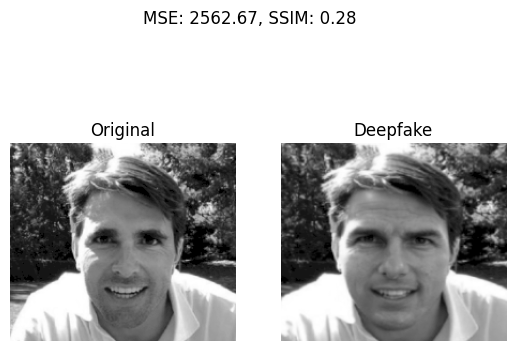

In [ ]:
compare_images(original_image, deepfake_image, title='Comparison', labelA='Original', labelB='Deepfake')
